In [33]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
df_0 = pd.read_csv('Data/prices_round_3_day_0.csv', delimiter=';')
df_1 = pd.read_csv('Data/prices_round_3_day_1.csv', delimiter=';')
df_2 = pd.read_csv('Data/prices_round_3_day_2.csv', delimiter=';')

In [14]:
df_0

,day,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
timestamp,,,,,,,,,,,,,,,,
0,0,CHOCOLATE,7999,111,NaN,NaN,NaN,NaN,8001,111,NaN,NaN,NaN,NaN,8000.0,0.0
0,0,STRAWBERRIES,3999,210,NaN,NaN,NaN,NaN,4001,210,NaN,NaN,NaN,NaN,4000.0,0.0
0,0,ROSES,14999,72,NaN,NaN,NaN,NaN,15001,72,NaN,NaN,NaN,NaN,15000.0,0.0
0,0,GIFT_BASKET,71348,19,71347.0,24.0,NaN,NaN,71362,19,71363.0,24.0,NaN,NaN,71355.0,0.0
100,0,GIFT_BASKET,71344,1,71343.0,12.0,71342.0,20.0,71355,1,71356.0,12.0,71357.0,20.0,71349.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999800,0,GIFT_BASKET,71131,19,71130.0,21.0,NaN,NaN,71145,19,71146.0,21.0,NaN,NaN,71138.0,0.0
999900,0,CHOCOLATE,7987,124,NaN,NaN,NaN,NaN,7989,124,NaN,NaN,NaN,NaN,7988.0,0.0
999900,0,GIFT_BASKET,71117,2,71116.0,16.0,71115.0,18.0,71128,2,71130.0,16.0,71131.0,18.0,71122.5,0.0


In [16]:
df_pivot

ask_price_1                                 bid_price_1              \
product     CHOCOLATE GIFT_BASKET  ROSES STRAWBERRIES   CHOCOLATE GIFT_BASKET   
timestamp                                                                       
0                8001       71362  15001         4001        7999       71348   
100              8002       71355  15001         4000        8001       71344   
200              8002       71350  15001         4000        8000       71344   
300              8003       71356  15001         4000        8002       71345   
400              8003       71347  14998         4000        8001       71336   
...               ...         ...    ...          ...         ...         ...   
999500           7988       71148  14544         4032        7987       71135   
999600           7989       71137  14549         4032        7988       71132   
999700           7988       71134  14547         4032        7987       71123   
999800           7990       71145  14547         4032        7989       71131   
999900           7989       71128  14551         4031        7987       71117   

                               
product    ROSES STRAWBERRIES  
timestamp                      
0          14999         3999  
100        14999         3999  
200        15000         3999  
300        14999         3999  
400        14997         3999  
...          ...          ...  
999500     14543         4030  
999600     14547         4030  
999700     14546         4030  
999800     14546         4030  
999900     14550         4030  

[10000 rows x 8 columns]

In [42]:
#df_0.set_index('timestamp', inplace=True)

# Create a multi-level column index by pivoting
# We'll group by the 'timestamp' and 'product', and then unstack the 'product' level
df_pivot = df_2.pivot_table(index='timestamp', 
                          columns='product', 
                          values=['ask_price_1', 'bid_price_1'],
                          aggfunc='first')  # Assuming you want the first occurrence if there are duplicates

# Filter out the required products
#df_filtered = df_pivot[['CHOCOLATE', 'STRAWBERRIES', 'ROSES', 'GIFT_BASKET']]


In [43]:
# For CHOCOLATE
df_pivot[('spread', 'CHOCOLATE')] = df_pivot[('ask_price_1', 'CHOCOLATE')] - df_pivot[('bid_price_1', 'CHOCOLATE')]

# For GIFT_BASKET
df_pivot[('spread', 'GIFT_BASKET')] = df_pivot[('ask_price_1', 'GIFT_BASKET')] - df_pivot[('bid_price_1', 'GIFT_BASKET')]

# For ROSES
df_pivot[('spread', 'ROSES')] = df_pivot[('ask_price_1', 'ROSES')] - df_pivot[('bid_price_1', 'ROSES')]

# For STRAWBERRIES
df_pivot[('spread', 'STRAWBERRIES')] = df_pivot[('ask_price_1', 'STRAWBERRIES')] - df_pivot[('bid_price_1', 'STRAWBERRIES')]


In [44]:
df_pivot[('spread', 'ETF_ARB_LONG_ETF')] = df_pivot[('ask_price_1', 'GIFT_BASKET')] - 4* df_pivot[('bid_price_1', 'CHOCOLATE')] - 6* df_pivot[('bid_price_1', 'STRAWBERRIES')] -  df_pivot[('bid_price_1', 'ROSES')]
df_pivot[('spread', 'ETF_ARB_SHORT_ETF')] = df_pivot[('bid_price_1', 'GIFT_BASKET')] - 4* df_pivot[('ask_price_1', 'CHOCOLATE')] - 6* df_pivot[('ask_price_1', 'STRAWBERRIES')] -  df_pivot[('ask_price_1', 'ROSES')]


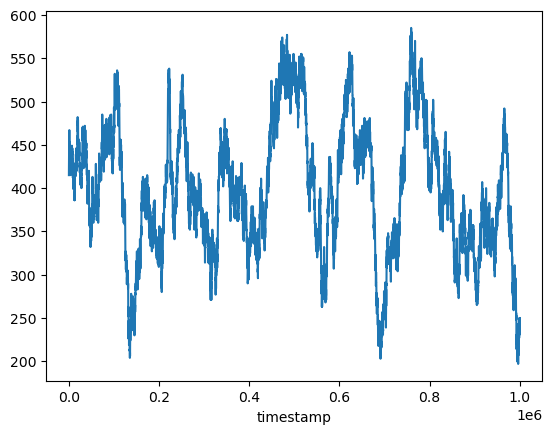

In [45]:
df_pivot[('spread', 'ETF_ARB_LONG_ETF')].plot()
plt.savefig('LONG_ETF_day2.png')

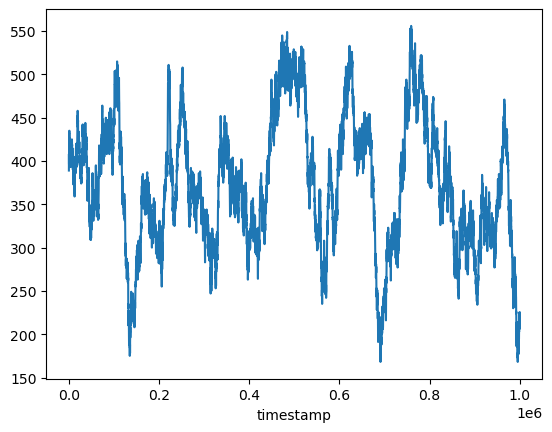

In [46]:
df_pivot[('spread', 'ETF_ARB_SHORT_ETF')].plot()
plt.savefig('SHORT_ETF_day2.png')